# Problem Definition


> This notebook is a part of the Kaggle "[LLM - Detect AI Generated Text](https://www.kaggle.com/competitions/llm-detect-ai-generated-text/overview)" competition



This competition challenges participants to develop a machine learning model that can accurately detect whether an essay was written by a student or an LLM. The competition dataset comprises a mix of student-written essays and essays generated by a variety of LLMs.



# Import Libraries

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
## Dataset Description

All of the essays were written in response to one of **seven essay prompts**. For each prompt:
- Students were instructed to read one or more source texts and then write a response.
- The same information may or may not have been provided as input to an LLM when generating an essay.

Essays from two of the prompts compose the **training set**, while the remaining essays compose the **hidden test set**. Nearly all of the training set essays were written by students, with only a few generated essays given as examples. You may wish to generate more essays to use as training data.

> **Note**: This is a Code Competition. The data in `test_essays.csv` is dummy data to help you author your solutions. When your submission is scored, this example test data will be replaced with the full test set. There are about **9,000 essays** in the test set, both student-written and LLM-generated.

## File structure

#### `{test|train}_essays.csv`

- `id` - A unique identifier for each essay.
- `prompt_id` - Identifies the prompt the essay was written in response to.
- `text` - The essay text itself.
- `generated` - Whether the essay was written by a student (`0`) or generated by an LLM (`1`). This field is the target and is **not present** in `test_essays.csv`.

#### `train_prompts.csv`

Essays were written in response to information in these fields:

- `prompt_id` - A unique identifier for each prompt.
- `prompt_name` - The title of the prompt.
- `instructions` - The instructions given to students.
- `source_text` - The text of the article(s) the essays were written in response to, in Markdown format.

  - **Format Details**:
    - Significant paragraphs are enumerated by a numeral preceding the paragraph on the same line, such as `0 Paragraph one.\n\n1 Paragraph two...`
    - Essays may reference a paragraph by its numeral.
    - Each article is preceded with its title in a heading, formatted as `# Title`.
    - When an author is indicated, their name will appear in the title after the word **by**.
    - Articles may also include subheadings formatted as `## Subheading`. Not all articles have authors indicated.


## Connect to Kaggle

To load the Kaggle dataset, you need to first download Kaggle's beta API.

Get Kaggle API Credentials:
- Go to your Kaggle account settings and scroll to the API section.
- Click on Create New API Token. This will download a kaggle.json file containing your Kaggle API credentials.

Then you need to upload the kaggle.json file to collab and run the following commands

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amrashrafkandil","key":"1d17ebbf21d4cea1c08abf3afbd3fdcd"}'}

In [ ]:
# move the file to the required directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
# Make sure the kaggle.json file has the correct permissions
!chmod 600 ~/.kaggle/kaggle.json

## Download Dataset Folder

In [ ]:
# Download the Dataset using the Kaggle API
!kaggle competitions download -c llm-detect-ai-generated-text

  0% 0.00/1.38M [00:00<?, ?B/s]
100% 1.38M/1.38M [00:00<00:00, 99.1MB/s]


The Dataset is downloaded as .zip file, and it needs to be extracted

In [ ]:
import zipfile
with zipfile.ZipFile('llm-detect-ai-generated-text.zip', 'r') as zip_ref:
    zip_ref.extractall('llm-detect-ai-generated-text')


## Load Training Data

In [ ]:
BASE_PATH = '/content/llm-detect-ai-generated-text'

In [ ]:
train_data = pd.read_csv(f'{BASE_PATH}/train_essays.csv')


In [ ]:
train_prompts = pd.read_csv(f'{BASE_PATH}/train_prompts.csv')

# Exploratory Data Analysis

In [ ]:
train_data.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [ ]:
train_data.describe()

,prompt_id,generated
count,1378.000000,1378.000000
mean,0.486212,0.002177
std,0.499991,0.046625
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [ ]:
train_data["generated"].unique()

array([0, 1])

Note:
- "Generated" has only two classes {0,1} or {not generated, generated}
- The Standard Deviation of this class is 0.04
- This means that the data biased towards the one class {not generated}




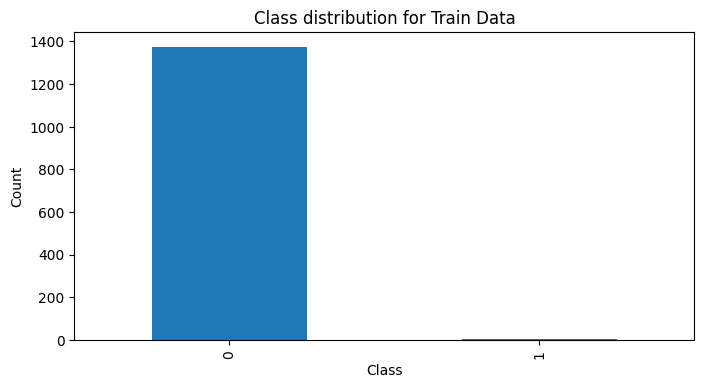

In [ ]:
# Show distribution of answers using a bar plot
plt.figure(figsize=(8, 4))
train_data.generated.value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class distribution for Train Data")
plt.show()

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedrcat/daigt-proper-train-dataset")

print("Path to dataset files:", path)

100%|██████████| 119M/119M [00:02<00:00, 46.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/thedrcat/daigt-proper-train-dataset/versions/4


In [ ]:
path

'/root/.cache/kagglehub/datasets/thedrcat/daigt-proper-train-dataset/versions/4'

In [ ]:
!kaggle datasets download thedrcat/daigt-proper-train-dataset
!kaggle datasets download alejopaullier/argugpt


Dataset URL: https://www.kaggle.com/datasets/thedrcat/daigt-proper-train-dataset
License(s): MIT
daigt-proper-train-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/alejopaullier/argugpt
License(s): unknown
  0% 0.00/3.26M [00:00<?, ?B/s]
100% 3.26M/3.26M [00:00<00:00, 141MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile('daigt-proper-train-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('daigt-proper-train-dataset')
with zipfile.ZipFile('argugpt.zip', 'r') as zip_ref:
    zip_ref.extractall('argugpt')

In [ ]:
new_ds1 = pd.read_csv('/content/daigt-proper-train-dataset/train_drcat_01.csv')

In [ ]:
new_ds1.label.value_counts()

,count
label,
0,25996
1,7263


In [ ]:
new_ds4 = pd.read_csv('/content/daigt-proper-train-dataset/train_drcat_03.csv')

In [ ]:
new_ds4.label.value_counts()

,count
label,
0,29792
1,12414
